In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import json

from agage_archive.io import read_nc, combine_datasets, read_ale_gage, Paths, scale_convert, create_dataset

paths = Paths()

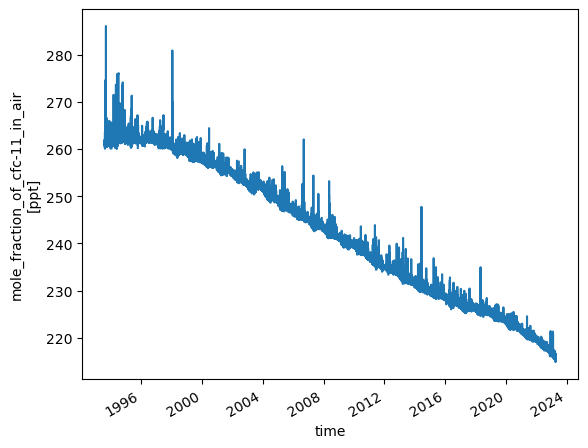

In [71]:
ds_agage = read_nc("CFC-11", "CGO", "GCMD")
ds_agage.mf.plot()


In [72]:
ds_gage = read_ale_gage("CFC-11", "CGO", "GAGE")

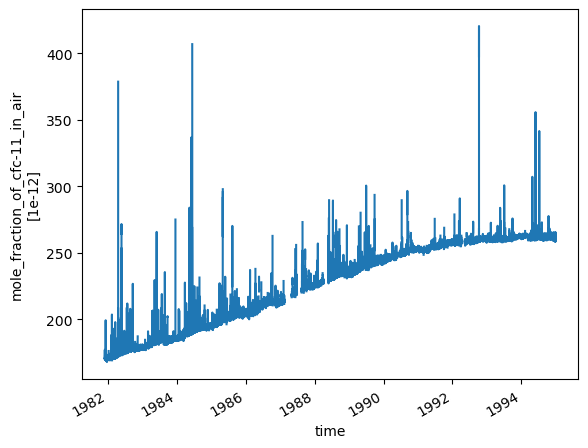

In [75]:
ds_gage.mf.plot()

In [79]:
ds = xr.concat([scale_convert(ds_gage, "SIO-05"),
                scale_convert(ds_agage, "SIO-05")], dim="time")

In [80]:
ds

<xarray.Dataset>
Dimensions:                   (time: 376928)
Coordinates:
  * time                      (time) datetime64[ns] 1981-11-30T13:01:00 ... 2...
Data variables:
    mf                        (time) float64 nan nan nan nan ... 215.7 215.4 nan
    mf_repeatability          (time) float64 nan nan nan ... 0.1481 0.1405 nan
    inlet_height              (time) int64 70 70 70 70 70 70 ... 70 70 70 70 70
    data_flag                 (time) object 'U' 'U' 'U' 'U' 'U' ... 0 0 0 0 0
    integration_flag          (time) object 'H' 'H' 'H' 'H' 'H' ... 0 0 0 0 0
    git_pollution_flag        (time) float64 nan nan nan nan ... 0.0 0.0 0.0 0.0
    met_office_baseline_flag  (time) float64 nan nan nan nan ... 0.0 0.0 0.0 0.0
Attributes: (12/13)
    comment:                    GAGE CFC-11 data from Kennaook/Cape Grim, Tas...
    data_owner_email:           
    data_owner:                 
    station_long_name:          Kennaook/Cape Grim, Tasmania, Australia
    inlet_base_elevation_masl:  94.0
    inlet_latitude:             -40.683
    ...                         ...
    inlet_comment:              
    data_dir:                   
    species:                    cfc-11
    calibration_scale:          SIO-05
    units:                      1e-12
    file_created:               2023-06-26 07:52:46

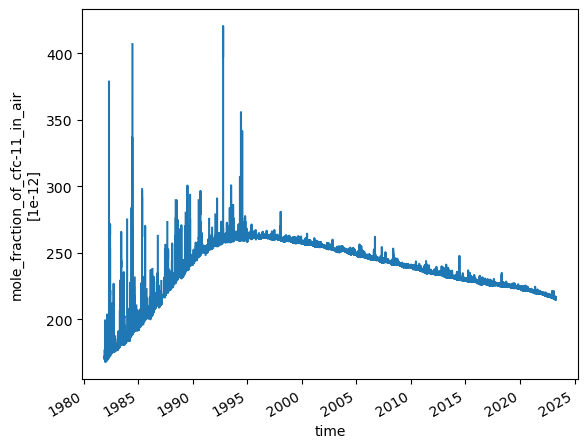

In [78]:
ds.mf.plot()